# BigData - CA 2
**Student Name:** Vinicius Moura Barros

**Student Number:** T00244396

---
Table of contents:

1. Business Understanding
    - Introduction
    - Literature Review
2. Data Understanding
    - Importing Libraries
    - Loading Dataset
    - Overview of Data
3. Data Selection (Select a relevant subset of the data for analysis.)
4. Pre-processing (Clean and transform the data to make it ready for analysis. This may include tasks such as data normalization, missing value handling, and data integration.)
    - Missing values imputation
    - Feature Engineering
5. Data Mining
6. Interpretation (Interpret the results and extract knowledge from the data. This may include tasks such as visualizing the results, evaluating the quality of the discovered patterns and identifying relationships and associations among the data)
7. Evaluation (Evaluate the results to ensure that the extracted knowledge is useful, accurate, and meaningful.)
8. Deployment (Use the discovered knowledge to solve the business problem and make decisions.)


## 1) Business Understanding

### Introduction
The Gender Gap is something that is still present in our society.
The focus of the analysis present in this notebook is to evaluate if there are any gender gaps present in Irish research programs. This will be done by reviewing existing academic literature about gender gap, especially in the academic field, understanding and compiling some publicly available metrics. After the literature review, the [SFI Gender Dashboard dataset](https://data.gov.ie/dataset/sfi-gender-dashboard/resource/6f2fa0ef-0248-422c-9762-dba0d28ef879) from Science Foundation Ireland will be imported and explored using KDD (Knowledge Discovery in Databases) to assess whether there are correlations with existing literature and to confirm some hypothesis defined before the analysis.



### Literature Review
According to the World Economic Forum's Global Gender Gap Report 2022, no single country has yet achieved full gender parity, but top 10 economies have closed at least 80% of the gap. Ireland is included in this list, being on the 9th place with 80.4% of the gap closed.
The same report analyzes different aspects of the gap, including the Educational Attainment. Ireland, among other countries is on the 1st place with 100% of the gap closed. This is a very positive result when combined with Ireland's overall Economic Participation score, which has increased +0.013, supported by "[...] continued parity in women’s participation as professional and technical workers, and by a reduction of gender gaps in estimated earned income, wage equality, and participation of legislators, senior officials and managers". However, in the opposite direction, women labour-force participation has decreased -0.026 in the same period, which is a negative result for the country.
The image below is a screenshot from the report, showing Ireland's score. Highlighted in green are the aspects that have improved, and highlighted in yellow are the aspects that were maintained since last year.

![Screenshot of Ireland's Score from Global Gender Gap Report 2022](references/ggg-2022-ireland-score.png "Screenshot of Ireland's Score from Global Gender Gap Report 2022")

The next image, also a screenshot of the same report shows index indicators for Ireland. The highlighted section shows the Educational Attainment index. And how Ireland has closed the gap in that section.

![Screenshot of Ireland's Index Indicators from Global Gender Gap Report 2022](references/ggg-2022-ireland-indicators.png "Screenshot of Ireland's Index Indicators from Global Gender Gap Report 2022")

The report also shows in details contextual indicators, see image below for more information on these indicators for Ireland, but main points can be resumed as follows:
- Ratio between female/male population is 1.01
- There are more females than males among graduates of the following areas:
  - Arts & Humanities
  - Education
  - Health & Welfare
  - Social Sciences, Journalist & Information
- There are more males than females among graduates of the following areas:
  - Agriculture, Forestry, Fisheries & Veterinary
  - Business, Administration & Law
  - Engineering, Manufacturing & Construction
  - Vocational training
  - PhD graduates
- And unfortunately there are no data available for the following areas:
  - STEM (Science, Technology, Engineering and Mathematics) Graduates
  - Information & Communication Technology
  - Natural Sciences, Mathematics & Statistics

![Screenshot of Ireland's Contextual Indicators from Global Gender Gap Report 2022](references/ggg-2022-ireland-contextual-indicators.png "Screenshot of Ireland's Contextual Indicators from Global Gender Gap Report 2022")


A. García-Holgado (2020) also studied the  Global Gender Report, from previous years, and universities from Europe and Latin America. In their paper it is highlighted that despite the educational gap being closed when looking into specific fields, like STEM, the gender gap is still present. Preliminary results of their study indicate that the percentage of woman in STEM field is around 30% and there are still work to be done to close this gap.

There are national and international initiatives, mentioned by A. García-Holgado (2018) in an earlier study, that aim to reduce the gender gap in the technology field, but as stated by L. Holman (2018, cited A. García-Holgado 2020), "STEM gender gap will not close without further reforms in education, mentoring and academic publishing".

L. Abazi-Bexheti (2019) used a Python Library to guess authors name and investigate the gender gap in over 4 million publications from the DBLP
Computer Science Bibliography. Some important points to be observed on their quantitative study:
- In number of published papers, the ratio female/male was always below 0.16.
- There is an upwards trend on the ratio (female/male) on the number of publications for books,articles and proceedings, but still currently bellow 0.30.





## 2) Data Understanding

The original source can be found online here [sft-gender-dataset from data.gov.ie](https://data.gov.ie/dataset/sfi-gender-dashboard/resource/6f2fa0ef-0248-422c-9762-dba0d28ef879). In there, we can find a dataset is available in CSV format ([link to csv](https://www.sfi.ie/about-us/women-in-science/gender/SFIGenderDashboard-TableauPublic-2022.csv)). A PDF is also provided with detailed information about the dataset ([link to pdf](https://www.sfi.ie/about-us/women-in-science/gender/SFI-Gender-Dashboard-Data-Summary-2022.pdf)).

The data is distributed in columns, described as follows:

- **Programme Name**: The programme under which the grant was awarded.
- **Applicant Gender**: The lead applicant’s self-declared gender at the time of their application.
- **Year**: Year the application was made.
- **Amount funded**: This is the total value of the grant awarded (direct costs) when it was approved. This has been rounded to the nearest 10,000.
- **Amount requested**: This is the total amount requested by the applicant on submission to SFI and includes awarded and declined applications. This has been rounded to the nearest 10,000.

The dataset contains data from Q1 2011 to Q3 2021, and the grants awarded are irrespective of whether the applicant accepted or declined the offer.



#### Importing Libraries
You might need to install some libraries. You can do so by running the following commands in your environment:
```bash
pip install pandas
pip install matplotlib
pip install scipy
```


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy

#### Loading Data

In [2]:
DATA_SOURCE = './data/SFIGenderDashboard-TableauPublic-2022.csv'
df = pd.read_csv(DATA_SOURCE)

#### Overview of Dataset

In [3]:
# Let's check the shape of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Programme Name    4242 non-null   object 
 1   Year              4242 non-null   int64  
 2   Award Status      4242 non-null   object 
 3   Applicant Gender  4242 non-null   object 
 4   Amount Requested  4181 non-null   float64
 5   Amount Funded     1284 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 199.0+ KB


In [4]:
# Let's check the first 5 rows of the dataset
df.head()

,Programme Name,Year,Award Status,Applicant Gender,Amount Requested,Amount Funded
0,SFI Research Centres,2012,Declined,Male,29700000.0,NaN
1,SFI Research Centres,2012,Declined,Male,27780000.0,NaN
2,SFI Research Centres,2012,Declined,Female,15040000.0,NaN
3,SFI Research Centres,2012,Declined,Male,16370000.0,NaN
4,SFI Research Centres,2012,Declined,Male,21650000.0,NaN


In [5]:
# Let's check the percentage of male/female applicants
values = df['Applicant Gender'].value_counts()
percentages = df['Applicant Gender'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
pd.concat([values,percentages], axis=1, keys=['count', 'percentage'])

,count,percentage
Male,2996,70.63%
Female,1246,29.37%


In [6]:
# Let's check how many missing values are in the dataset
df.isna().sum()

Programme Name         0
Year                   0
Award Status           0
Applicant Gender       0
Amount Requested      61
Amount Funded       2958
dtype: int64

In [7]:
# Let's visualize the missing values where AmountRequests is null
df[df['Amount Requested'].isna()]

,Programme Name,Year,Award Status,Applicant Gender,Amount Requested,Amount Funded
812,SFI President of Ireland Young Researcher Award,2013,Declined,Male,NaN,NaN
816,SFI President of Ireland Young Researcher Award,2013,Declined,Male,NaN,NaN
930,SFI President of Ireland Young Researcher Award,2013,Declined,Female,NaN,NaN
947,SFI President of Ireland Young Researcher Award,2013,Declined,Male,NaN,NaN
948,SFI President of Ireland Young Researcher Award,2014,Declined,Male,NaN,NaN
...,...,...,...,...,...,...
2787,SFI President of Ireland Future Research Leaders,2018,Declined,Male,NaN,NaN
2788,SFI President of Ireland Future Research Leaders,2018,Declined,Female,NaN,NaN
2789,SFI President of Ireland Future Research Leaders,2018,Declined,Male,NaN,NaN
2800,SFI Centres for Research Training,2018,Declined,Male,NaN,NaN


In [8]:
df.corr()

,Year,Amount Requested,Amount Funded
Year,1.000000,-0.146185,-0.148894
Amount Requested,-0.146185,1.000000,0.996628
Amount Funded,-0.148894,0.996628,1.000000


#### Summary of data overview
- As the dataset is considerably small, we want to use all the columns present, so none of them will be dropped.
- There are some missing data, mainly in Amount Request and Amount Funded.
- Some columns are strings (Program Name, Applicant Gender and Award Category), so we will need to transform them into numerical values, so that they can be used in the analysis, such as finding correlation between the columns.

 The required changes will be handled in the next step.



## 3) Data Selection
As mentioned in previous point, the dataset is considerably small and all existing columns will be utilized, so none of them will be dropped.

## 4) Pre-Processing

### Missing values imputation

By analyzing the missing values, it was decided that:
- Amount Funded should be equal to 0 when the value is not present.
- Amount Requested should be equal to Amount Funded, when Amount Funded is greater than 0.


In [9]:
df['Amount Funded'] = df['Amount Funded'].fillna(0)

In [10]:
df['Amount Requested'] = df['Amount Requested'].fillna(df['Amount Funded'])

In [11]:
# Let's check how many missing values are in the dataset after filling the missing values
df.isna().sum()

Programme Name      0
Year                0
Award Status        0
Applicant Gender    0
Amount Requested    0
Amount Funded       0
dtype: int64

### Data Normalization
As part of data in the dataset are strings/objects, we need to transform them into numerical values, so that they can be used in the analysis. For that, we will create 2 new columns and use the pandas function `astype('category').cat.codes` to transform the data into numerical values.


In [12]:
#let's create new columns for program, gender and award result as categories, so that they can be used to find correlations
df['Program Category'] = df['Programme Name'].astype('category').cat.codes
df['Gender Category'] = df['Applicant Gender'].astype('category').cat.codes
df['Award Category'] = df['Award Status'].astype('category').cat.codes

In [13]:
df.head()

,Programme Name,Year,Award Status,Applicant Gender,Amount Requested,Amount Funded,Program Category,Gender Category,Award Category
0,SFI Research Centres,2012,Declined,Male,29700000.0,0.0,13,1,1
1,SFI Research Centres,2012,Declined,Male,27780000.0,0.0,13,1,1
2,SFI Research Centres,2012,Declined,Female,15040000.0,0.0,13,0,1
3,SFI Research Centres,2012,Declined,Male,16370000.0,0.0,13,1,1
4,SFI Research Centres,2012,Declined,Male,21650000.0,0.0,13,1,1


##  5)Data Mining & Interpretation of the Data
In this section we will apply data mining techniques to the data.
We'll try to explore the data being led by the questions this study wants to find answers from. After analysing each some apectes of the data, insights will be noted. These will help us when putting together final answers. As a reminder, these are questions we want to answer as part of this study:

1. Are there any correlations between the dataset columns?
2. How are applicants distributed between genders over the years?
3. How are awarded grants distributed between genders applicants over years?
4. Is there a correlation between the amount granted and gender?
5. Is there a specific research program that is predominantly composed by a specific gender?

In [14]:
 # Let's check if there are any correlations between the columns (Question 1)
correlation = df.corr()
correlation.style.background_gradient(cmap='GnBu').format(precision=3)

,Year,Amount Requested,Amount Funded,Program Category,Gender Category,Award Category
Year,1.000,-0.145,-0.063,-0.138,-0.118,-0.056
Amount Requested,-0.145,1.000,0.596,0.038,0.070,-0.003
Amount Funded,-0.063,0.596,1.000,0.026,0.033,-0.229
Program Category,-0.138,0.038,0.026,1.000,-0.041,-0.008
Gender Category,-0.118,0.070,0.033,-0.041,1.000,0.011
Award Category,-0.056,-0.003,-0.229,-0.008,0.011,1.000


**Insights for Question 1:**
- Unfortunately there are no outstanding correlations between the values, except for amount requested and amount funded.


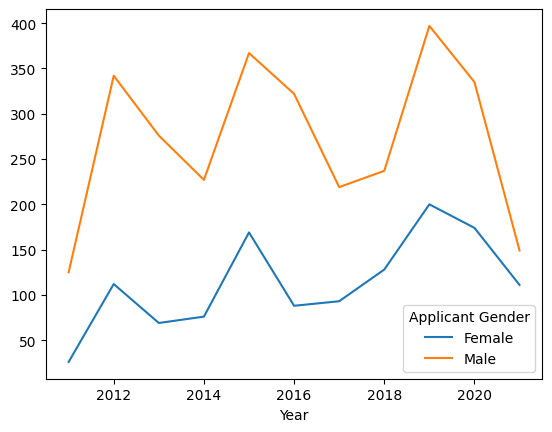

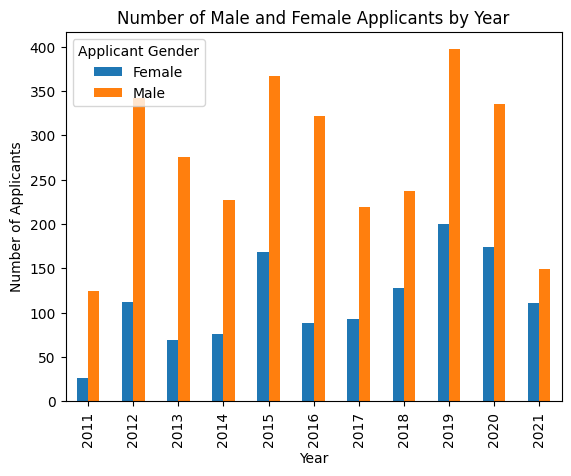

In [15]:
# Let's see the number of applicants per year (Question 2)

df_grouped_by_year = df.groupby(['Year', 'Applicant Gender']).size().unstack()
df_grouped_by_year.plot(kind='line', stacked=False)
df_grouped_by_year.plot(kind='bar', stacked=False)

plt.xlabel('Year')
plt.ylabel('Number of Applicants')
plt.title('Number of Male and Female Applicants by Year')

# Show the plot
plt.show()

Applicant Gender  Female  Male
Year                          
2011                  26   125
2012                 112   342
2013                  69   276
2014                  76   227
2015                 169   367
2016                  88   322
2017                  93   219
2018                 128   237
2019                 200   397
2020                 174   335
2021                 111   149
Year
2011    17.218543
2012    24.669604
2013    20.000000
2014    25.082508
2015    31.529851
2016    21.463415
2017    29.807692
2018    35.068493
2019    33.500838
2020    34.184676
2021    42.692308
dtype: float64


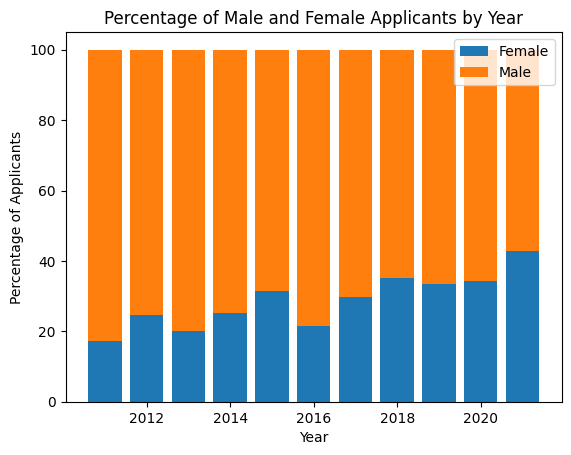

In [16]:
# Let's try to plot a chart of the number of applicants in percentage, per year and see if we can observe any trends (Question 2)

def plot_applicants_percentage_over_years(df, print_df=False):
    df_grouped_by_year = df.groupby(['Year', 'Applicant Gender']).size().unstack()
    if print_df:
        print(df_grouped_by_year)

    # Calculate the total number of applicants for each year
    totals = df_grouped_by_year.sum(axis=1)

    # Calculate the percentage of males and females for each year
    percent_female = df_grouped_by_year['Female'] / totals * 100
    percent_male = df_grouped_by_year['Male'] / totals * 100

    if print_df:
        print(percent_female)

    # Create a stacked bars charts
    plt.bar(df_grouped_by_year.index, percent_female, label='Female')
    plt.bar(df_grouped_by_year.index, percent_male,bottom=percent_female, label='Male')

    # adding labels
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Percentage of Applicants')
    plt.title('Percentage of Male and Female Applicants by Year')

    plt.show()
plot_applicants_percentage_over_years(df, print_df=True)

**Insights for Question 2:**
- From the first chart, we can observe an upward trend in the number of applicants from both genders
- From the second chart, in 2015 number of female applicants pretty much doubled in comparison to the previous year.
- From the third chart, we can observe another upward trend in the overall percentage of woman applying for grants, in 2021 being 42% of the total number of applicants.


Award Status           Awarded  Declined  Pct Awarded
Year Applicant Gender                                
2011 Female                  6        20    23.076923
     Male                   24       101    19.200000
2012 Female                 21        91    18.750000
     Male                   71       271    20.760234
2013 Female                 20        49    28.985507
     Male                   72       204    26.086957
2014 Female                 29        47    38.157895
     Male                   89       138    39.207048
2015 Female                 50       119    29.585799
     Male                  116       251    31.607629
2016 Female                 32        56    36.363636
     Male                  101       221    31.366460
2017 Female                 35        58    37.634409
     Male                   78       141    35.616438
2018 Female                 48        80    37.500000
     Male                   90       147    37.974684
2019 Female                 

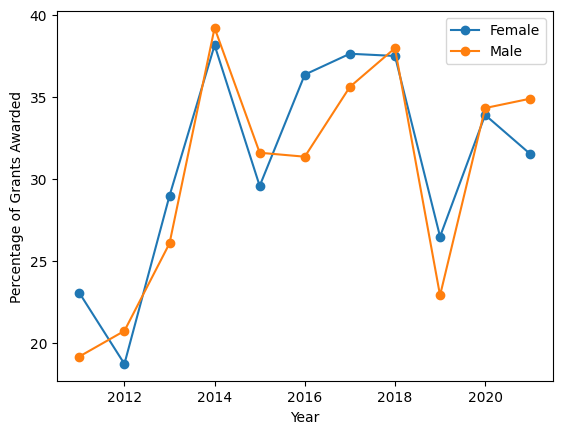

In [17]:
# Let's see if we can visualize in percentage, how grants awarded are distributed, according to gender, over the years (Question 3)
def plot_awarded_grants_per_gender_per_year(df, print_df=False):
    df_grouped_by_year = df.groupby(['Year', 'Applicant Gender', 'Award Status']).size().unstack()
    # let's calculate the percentege of awarded grants per gender per year
    df_grouped_by_year['Pct Awarded'] = df_grouped_by_year['Awarded'] / (df_grouped_by_year['Awarded'] + df_grouped_by_year['Declined']) * 100
    if print_df:
        print(df_grouped_by_year)

    # let's create another df, as we only need Pct Awarded colum
    df_to_plot = df_grouped_by_year[['Pct Awarded']]
    df_to_plot = df_to_plot.groupby(['Year', 'Applicant Gender']).sum().unstack()

    df_to_plot.plot(kind='line', stacked=False, marker='o')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Grants Awarded')
    plt.legend(['Female', 'Male'])
    plt.show()

plot_awarded_grants_per_gender_per_year(df, print_df=True)

**Insights for Question 3**:
- Trends for both seems similar across the years
- In 5 periods (2011, 2013, 2016, 2017 and 2019) there were more grands awarded to females (in relative percentage)
- in 6 periods there were more grands awarded to males (in relative percentage)

In [18]:
# Let's see if there are any differences between amount request and amount funded according to gender (Question 4)
# For this investigation, we'll make sure to ignore Amount funder = 0, as it was probably due to missing data, and it could impact the metrics
awarded = df[(df['Award Status'] == 'Awarded') & df['Amount Funded'] > 0]

# Let's calculate what % of the amount requested was funded
awarded['Pct Requested and Funded'] = awarded['Amount Funded'] / awarded['Amount Requested'] * 100
awarded.groupby('Applicant Gender')['Pct Requested and Funded'].describe()


d:\repos\mtu-artificial-inteligence\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,count,mean,std,min,25%,50%,75%,max
Applicant Gender,,,,,,,,
Female,387.0,97.486250,8.417793,53.623188,98.322807,100.0,100.0,162.222222
Male,892.0,96.211027,11.024009,3.333333,96.747312,100.0,100.0,200.000000


**Insights for Question 4**:
- In average, Females receive 97.48% of requested funds and Males receive 96.21%
- Despite the min/max percentages for funded, the other basic metrics show that average, 25%, 50% and 75% are similar for both genders (less than 2% of difference)

Applicant Gender                                    Female  Male
Programme Name                                                  
SFI COVID-19 Rapid Response Funding Programme 2...      25    97
SFI COVID-19 Rapid Response Funding Programme 2...      34    59
SFI Career Development Award                            89   210
SFI Centres for Research Training                        1    13
SFI Frontiers for the Future                           275   475
SFI Future Innovator Prize                              17    86
SFI Industry Fellowship                                 95   214
SFI Industry RDI Fellowship Programme                    9    30
SFI Investigator Programme/Principal Investigat...     174   752
SFI Investigator Project Award                          86   188
SFI President of Ireland Future Research Leaders        20    47
SFI President of Ireland Young Researcher Award         13    22
SFI Public Service Fellowship Programme                 13    15
SFI Research Centres     

<AxesSubplot:ylabel='Programme Name'>

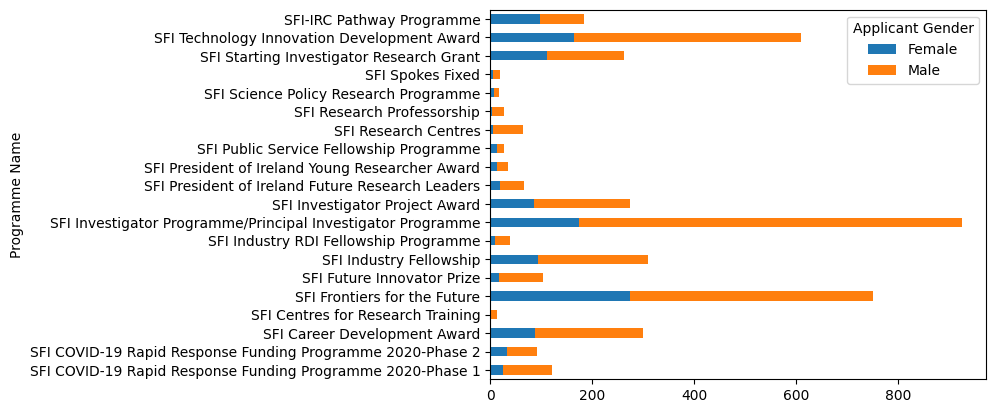

In [19]:
# Let's group by program and see how many applicants there were per gender (Question 5)
grouped_by_program = df.groupby(['Programme Name', 'Applicant Gender']).size().unstack()
print(grouped_by_program)
grouped_by_program.plot(kind='barh', stacked=True)

Applicant Gender                                    Female  Male
Programme Name                                                  
SFI COVID-19 Rapid Response Funding Programme 2...      10    49
SFI COVID-19 Rapid Response Funding Programme 2...      11    15
SFI Career Development Award                            16    55
SFI Centres for Research Training                        1     5
SFI Frontiers for the Future                            65    80
SFI Future Innovator Prize                              14    42
SFI Industry Fellowship                                 76   159
SFI Industry RDI Fellowship Programme                    8    22
SFI Investigator Programme/Principal Investigat...      29   160
SFI Investigator Project Award                          15    37
SFI President of Ireland Future Research Leaders         9     6
SFI President of Ireland Young Researcher Award          2     1
SFI Public Service Fellowship Programme                  4    10
SFI Research Centres     

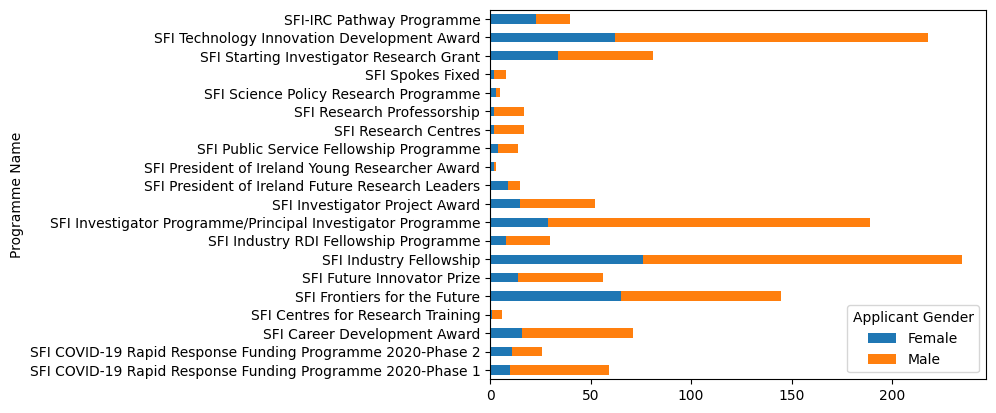

In [20]:
# Let's group by program and see how many applicants there were per gender (Question 5)
def plot_female_male_awarded_funds(df, print_df=False):
    df_awarded = df[df['Award Status'] == 'Awarded']
    grouped_by_program = df_awarded.groupby(['Programme Name', 'Applicant Gender']).size().unstack()
    if print_df:
        print(grouped_by_program)
    grouped_by_program.plot(kind='barh', stacked=True)

plot_female_male_awarded_funds(df, print_df=True)

**Insights for Question 5**:
- In every programme, there are more male applicants than female applicants.
- Despite the higher number of male applicants:There are 4 Programme that have awarded funds to more females than males:
  - SFI President of Ireland Young Researcher Award
  - SFI President of Ireland Future Research Leaders
  - SFI Scienec Policy Research Programme
  - SFI-IRC Pathway Programme

## Evaluation & Interpretation
In this section, insights found during previous section will be compared with topics covered during literature review to evaluate whether the data analysed reflects or correlates with existing studies.

### Limitations
Some limitations were identified during the analysis, and it is important to highlight them before drawing any conclusions:
- The dataset used in this analysis is from 2011 to 2021, which is a relatively short period of time and only from one source: the Science Foundation Ireland.
- The dataset is also relatively small, with around 4000 lines of data
- The studies used as reference in the literature review are not covering exclusively Ireland, but also other countries.
- References are mainly covering academic and industries. Whether the dataset is exclusively covering researches grants being awarded to individuals.
- Despite the observation of correlations and trends, it is not possible to conclude that there is a direct cause and effect relationship between the variables analysed.

### Questions and Insights

#### Question 1) Are there any correlations between the dataset columns?
The only correlation that could be observed was between the amount requested and the amount funded.


In [21]:
correlation = df.corr()
correlation.style.background_gradient(cmap='GnBu').format(precision=3)

,Year,Amount Requested,Amount Funded,Program Category,Gender Category,Award Category
Year,1.000,-0.145,-0.063,-0.138,-0.118,-0.056
Amount Requested,-0.145,1.000,0.596,0.038,0.070,-0.003
Amount Funded,-0.063,0.596,1.000,0.026,0.033,-0.229
Program Category,-0.138,0.038,0.026,1.000,-0.041,-0.008
Gender Category,-0.118,0.070,0.033,-0.041,1.000,0.011
Award Category,-0.056,-0.003,-0.229,-0.008,0.011,1.000


#### Question 2) How are applicants distributed between genders over the years?
Despite the Global Gender Gap report from 2022 show that Ireland has closed the gender gap in matters of Educational Attainment, the same does not reflect in the number of applicants for research grants for SFI. The gap is still present with males being the majority of applicants for funded researches.

As suggested by  L. Holman (2018, cited A. García-Holgado 2020), "STEM gender gap will not close without further reforms in education, mentoring and academic publishing". Based on the analysis done in this study we also believe that Funded Researches should also be included in such reforms to reduce the gender gap.

Findings from this study can also might also correlate with what was found by L. Abazi-Bexheti (2019) in relation to the number of published material by females. It would be interesting to see if there is a correlation between the number of published material and the number of funded researches. And as the gap appears to be closed with funded researches as the years go by, maybe the gap will also be closed with published material.

Nevertheless, we could observe that the number of female applicants has increased over the years, and the representative percentage of females applying for grants has also increased, mostly year after year, with higlight for 2021 where females were 42% of total number the applicants.

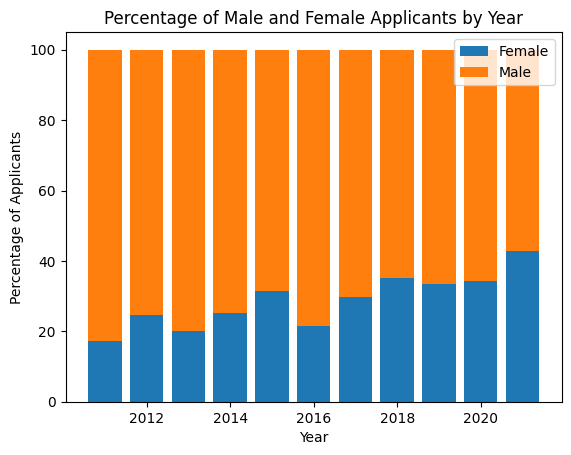

In [22]:
plot_applicants_percentage_over_years(df)

#### Question 3) How are awarded grants distributed between genders applicants over years?
Considering the percentage of awarded funds in relation to the number of applicants, grouped by gender, we could observe that:
- Trends for both, males and females, seems similar across the years.
- In 5 periods (2011, 2013, 2016, 2017 and 2019) there were more grands awarded to females
- in 6 periods there were more grands awarded to males

This might suggest that despite number of female applicants being smaller, the success rate of approval for grants is not based on gender, and potentially on the quality of the research proposal.

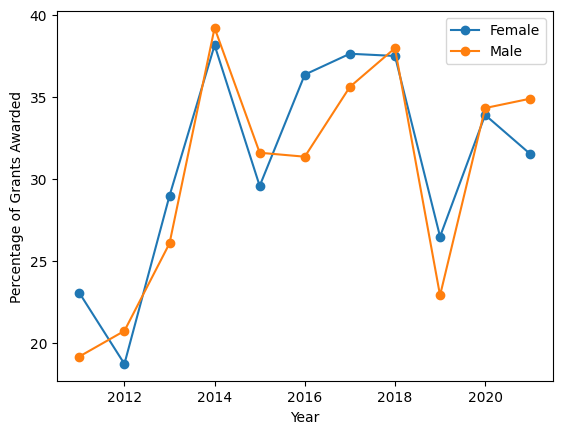

In [23]:
plot_awarded_grants_per_gender_per_year(df)

#### Question 4) Is there a correlation between the amount granted and gender?
Similar to previous question, in the data analyzed for this topic, females receive 97.48% of requested funds and males receive 96.21%.
As it can be observed in next cell, despite the min/max values, the other basic metrics show that average, 25%, 50% and 75% are similar for both genders (less than 2% of difference).


In [24]:
awarded = df[(df['Award Status'] == 'Awarded') & df['Amount Funded'] > 0]

# Let's calculate what % of the amount requested was funded
awarded['Pct Requested and Funded'] = awarded['Amount Funded'] / awarded['Amount Requested'] * 100
awarded.groupby('Applicant Gender')['Pct Requested and Funded'].describe()

d:\repos\mtu-artificial-inteligence\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,count,mean,std,min,25%,50%,75%,max
Applicant Gender,,,,,,,,
Female,387.0,97.486250,8.417793,53.623188,98.322807,100.0,100.0,162.222222
Male,892.0,96.211027,11.024009,3.333333,96.747312,100.0,100.0,200.000000


#### Question 5) Is there a specific research program that is predominantly composed by a specific gender?
The data analysed shows that in every single program, there are more male applicants than female applicants. However, despite the higher number of male applicants, there are 4 Programmes that have awarded funds to more females than males:
  - SFI President of Ireland Young Researcher Award
  - SFI President of Ireland Future Research Leaders
  - SFI Scienec Policy Research Programme
  - SFI-IRC Pathway Programme

This can be observed below:

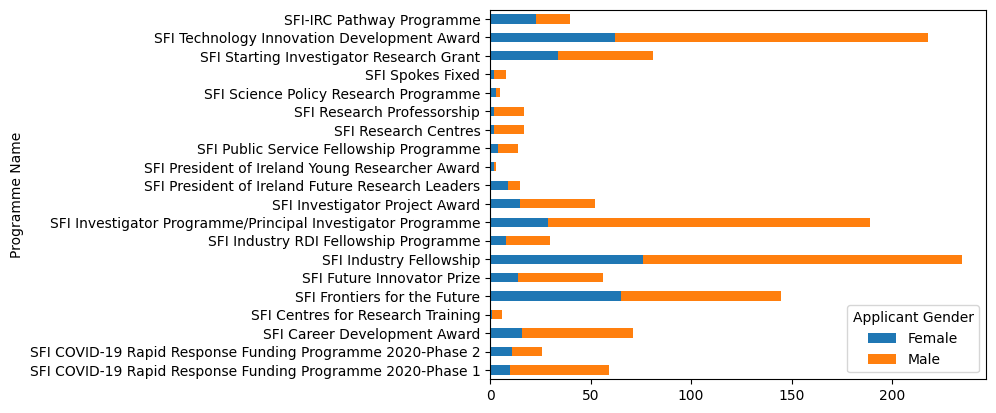

In [25]:
plot_female_male_awarded_funds(df)

### Conclusions

This study aimed to verify whether the gender gap is still present in Irish researches, by utilizing a publicly available dataset from Science Foundation Ireland. The analysis of the dataset was combined with a literature review to evaluate the findings and find correlations. Despite being limited by a number of factors, the study was able to identify some trends that indicate that gender gap is still present in Irish researches, but it appears to be improving over the years.


### References

1. World Economic Forum. (2022). The Global Gender Gap Report 2022. [online] Available at: https://www.weforum.org/reports/global-gender-gap-report-2022 [Accessed 10 Mar. 2023].
2. A. García-Holgado et al., "Gender equality in STEM programs: a proposal to analyse the situation of a university about the gender gap," 2020 IEEE Global Engineering Education Conference (EDUCON), Porto, Portugal, 2020, pp. 1824-1830, doi: 10.1109/EDUCON45650.2020.9125326.
3. L. Abazi-Bexheti, A. Kadriu and M. Apostolova, "Investigating Gender Gap in Computer Science Research Community," 2019 42nd International Convention on Information and Communication Technology, Electronics and Microelectronics (MIPRO), Opatija, Croatia, 2019, pp. 737-741, doi: 10.23919/MIPRO.2019.8757190.
4. A. García-Holgado, J. Mena, F. J. García-Peñalvo and C. González, "Inclusion of gender perspective in Computer Engineering careers: Elaboration of a questionnaire to assess the gender gap in tertiary education," 2018 IEEE Global Engineering Education Conference (EDUCON), Santa Cruz de Tenerife, Spain, 2018, pp. 1547-1554, doi: 10.1109/EDUCON.2018.8363417.
5. L. Holman, D. Stuart-Fox, and C. E. Hauser, "The gender gap in science: How long until women are equally represented?," PLoS Biol, vol. 16, no. 4, p. e2004956, 2018, doi: 10.1371/journal.pbio.2004956.
